In [1]:
import os
import sys

os.chdir('../')

from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np

import pandas as pd
def is_business_day(date):
        return bool(len(pd.bdate_range(date,date)))

In [7]:
cfg = 'configs/Mississauga_cfg.yml' #'configs/east_box.yml' #'configs/Mississauga_cfg.yml' # 'configs/Point_Edward_cfg.ym
prices = ['free', 'half','none','peak_offpeak']
mdf_res = []
for price_mech in prices:
    model = EVSpaceModel(cfg=cfg,ModelP_price_set_mechanism = price_mech)  
    model.run_model(2400) #24*365   
    # model.save()
    mdf = model.datacollector.get_model_vars_dataframe()
    mdf['price'] = price_mech
    mdf['isbusinessday'] = [is_business_day(date) for date in mdf.date_time]
    mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour
    mdf_res.append(mdf)
mdf_all = pd.concat(mdf_res,ignore_index=True)

c:\Users\gwharf\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\gwharf\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\gwharf\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\gwharf\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor w

<AxesSubplot:xlabel='hour', ylabel='charge_load'>

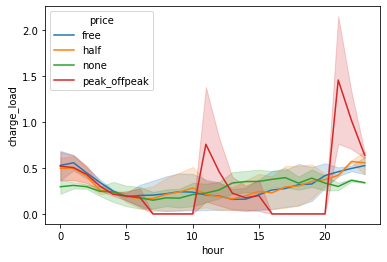

In [9]:
mdf_all_hours = mdf_all.groupby(['model_name','price','hour','isbusinessday']).mean().reset_index()

import seaborn as sns

fig,ax = plt.subplots()
sns.lineplot(data=mdf_all_hours,x='hour',y='charge_load',hue='price',ax=ax)